# AICE Professioanl 대비 - 이미지 처리(CNN, Transfer-Learning) 실습
- tf_flowers 데이터셋 - 5개의 꽃 클래스를 포함한 이미지 분류 데이터셋:


## 모델링 순서

**1. 데이터 로드 및 공통 전처리**
- image_dataset_from_directory활용 train_data, validation_data Load
- 데이터 시각화
- Preprocess -> /.255(정규화)

**2. 기본 CNN 모델**
- 2.1 CNN 모델링
- 2.2 CNN 모델 평가 및 예측
- 2.3 CNN 모델 예측결과 시각화

**3. Transfer Learninig-VGG**
- 3.1 VGG16 모델링
- 3.2 VGG16 모델 평가 및 예측
- 3.3 VGG16 모델 예측결과 시각화

**4. Transfer Learninig-MobileNET**
- 4.1 MobileNetV2 모델링
- 4.2 MobileNetV2 모델 평가 및 예측
- 4.3 MobileNetV2 모델 예측결과 시각화

**5. Tensorflow - ImageDataGenerator 활용 모델링**
- 5.1 image data generator 활용 Data Augmentation
- 5.2 Augmented Dataset 기반 기본CNN 모델 성능개선 평가





---



---



# 1. 데이터 로딩 및 전처리
- tf.keras.utils.get_file 함수를 사용하여 URL에서 데이터를 다운로드하고, 압축을 풀어 로컬 디렉토리로 저장합니다.
- data_dir은 pathlib 모듈을 사용하여 데이터를 관리할 경로입니다.

In [ ]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pathlib

# 데이터셋 URL
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# 데이터셋 다운로드 및 압축 해제
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

# 데이터 디렉토리 출력
print(f"데이터셋 경로: {data_dir}")


데이터셋 경로: /root/.keras/datasets/flower_photos


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 이미지 크기 및 배치 사이즈 설정
IMG_SIZE = 224
BATCH_SIZE = 64

# 학습용 및 테스트용 데이터셋을 폴더에서 불러옴
dataset = """입력하세요"""(data_dir,
                                       shuffle=True,
                                       image_size=(IMG_SIZE,IMG_SIZE),
                                       batch_size=BATCH_SIZE)

# 클래스 이름 확인
class_names = dataset.class_names
print(f"클래스 이름: {class_names}")

# 학습용과 테스트용 데이터셋 분할
train_size = 0.8
train_dataset = dataset.take(int(len(dataset) * train_size))
test_dataset = dataset.skip(int(len(dataset) * train_size))


Found 3670 files belonging to 5 classes.
클래스 이름: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
# 전처리 및 데이터 최적화
AUTOTUNE = tf.data.experimental.AUTOTUNE

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))
    image = image / 255.0  # 정규화
    return image, label

train_dataset = train_dataset.map(preprocess).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.map(preprocess).prefetch(buffer_size=AUTOTUNE)



---



---



# 2. 기본 CNN 모델

In [ ]:
from tensorflow.keras import layers, models

# CNN 모델 정의
model_cnn = models.Sequential([
    layers."""입력하세요"""(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers."""입력하세요"""(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers."""입력하세요"""(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense("""입력하세요""", activation='"""입력하세요"""')  # 5개의 클래스
])

# 모델 컴파일
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model_cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 조기종료 콜백함수 정의(EarlyStopping)
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.keras'
cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# 모델 학습
history_cnn = model_cnn.fit(train_dataset, validation_data="""입력하세요""", epochs=30, batch_size=BATCH_SIZE, callbacks=[es, cp], verbose=1)

Epoch 1/30
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3600 - loss: 1.7428
Epoch 1: val_loss improved from inf to 1.11481, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.3649 - loss: 1.7223 - val_accuracy: 0.5152 - val_loss: 1.1148
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5939 - loss: 1.0142
Epoch 2: val_loss improved from 1.11481 to 0.89694, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5943 - loss: 1.0137 - val_accuracy: 0.6639 - val_loss: 0.8969
Epoch 3/30
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7081 - loss: 0.7696
Epoch 3: val_loss improved from 0.89694 to 0.79211, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7086 - loss: 0.7698 - val_accuracy: 0.6901 - val_loss: 0.7921
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8129 - loss: 0.5313
Epoch 4: val_loss improved from 0.79211 to 0.7468

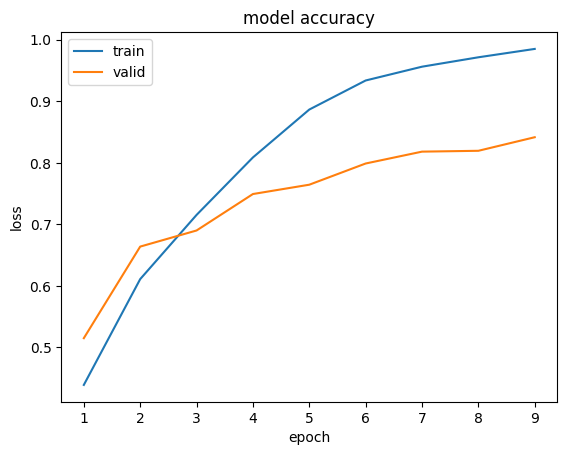

In [ ]:
epochs = range(1, len(history_cnn.history['accuracy']) + 1)
plt.plot(epochs, history_cnn.history['accuracy'])
plt.plot(epochs, history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], )
plt.show()

In [ ]:
# 모델 평가
loss, accuracy = model_cnn.evaluate(test_dataset)
print(f'기본 CNN 모델 정확도: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8634 - loss: 0.6969
기본 CNN 모델 정확도: 0.8429751992225647


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 클래스 이름 가져오기 (꽃 종류)
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# 배치를 해제하여 개별 이미지와 레이블을 가져옵니다.
validation_unbatched = test_dataset.unbatch()

# 검증 데이터에서 처음 10개 이미지 가져오기
sample_images = []
sample_labels = []
for image, label in validation_unbatched.take(10):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# 이미지 배열로 변환
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# 예측 수행
predictions = model_cnn.predict(sample_images)

# 예측 결과 시각화
for i in range(len(sample_images)):
    plt.figure()
    plt.imshow(sample_images[i])

    # 예측값은 확률로 출력되므로 argmax로 가장 높은 확률을 가진 클래스를 선택
    predicted_label = np.argmax(predictions[i])
    true_label = sample_labels[i]

    # 클래스 이름으로 라벨 변환
    predicted_class_name = class_names[predicted_label]
    true_class_name = class_names[true_label]

    plt.title(f'Pred: {predicted_class_name} / True: {true_class_name}')
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# 3.Transfer Learninig-VGG
## 3.1 VGG16 모델링
**VGG16을 사용한 Transfer Learning 모델링**
- VGG16은 이미지 분류에서 성능이 우수한 사전 훈련된 모델입니다. Transfer Learning은 미리 학습된 모델을 가져와 새로운 작업에 맞게 미세 조정(fine-tuning)하는 방식입니다. 이는 데이터가 많지 않거나 학습 시간이 부족할 때 매우 유용합니다.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# VGG16 모델 로드 (사전 학습된 가중치 사용)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# 추가 레이어 정의
x = base_model.output
x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling으로 특징을 축소
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# 최종 모델 정의
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# 베이스 모델의 가중치는 동결
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model_vgg16.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model_vgg16.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 조기종료 콜백함수 정의(EarlyStopping)
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.keras'
cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# 모델 학습
history_vgg16 = model_vgg16.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    batch_size=BATCH_SIZE,
    callbacks=[es, cp],
    verbose=1
)

Epoch 1/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4354 - loss: 1.4500
Epoch 1: val_loss improved from inf to 1.00768, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.4406 - loss: 1.4423 - val_accuracy: 0.6543 - val_loss: 1.0077
Epoch 2/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6937 - loss: 0.9098
Epoch 2: val_loss improved from 1.00768 to 0.77645, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6944 - loss: 0.9079 - val_accuracy: 0.7507 - val_loss: 0.7764
Epoch 3/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7765 - loss: 0.7035
Epoch 3: val_loss improved from 0.77645 to 0.71772, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.7759 - loss: 0.7039 - val_accuracy: 0.7713 - val_loss: 0.7177
Epoch 4/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8035 - loss: 0.6199
Epoch 4: val_loss improved from 0.71772 to 0.63

## 3.2 VGG16 모델 평가 및 예측

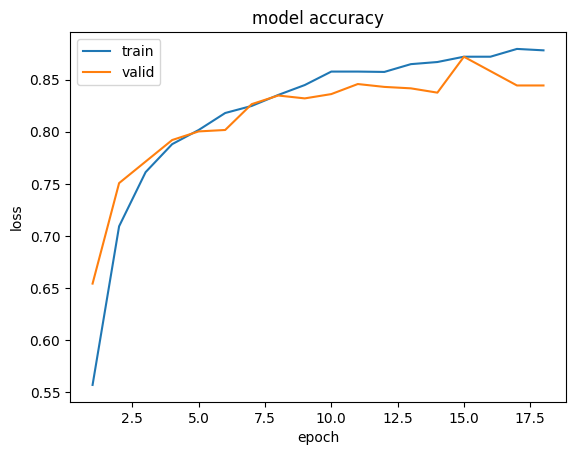

In [ ]:
epochs = range(1, len(history_vgg16.history['accuracy']) + 1)
plt.plot(epochs, history_vgg16.history['accuracy'])
plt.plot(epochs, history_vgg16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], )
plt.show()

In [ ]:
# 모델 평가
loss, accuracy = model_vgg16.evaluate(test_dataset)
print(f'VGG16 모델 정확도: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8675 - loss: 0.3918
VGG16 모델 정확도: 0.8567492961883545


## 3.3 VGG16 모델 예측결과 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 클래스 이름 가져오기 (꽃 종류)
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# 배치를 해제하여 개별 이미지와 레이블을 가져옵니다.
validation_unbatched = test_dataset.unbatch()

# 검증 데이터에서 처음 10개 이미지 가져오기
sample_images = []
sample_labels = []
for image, label in validation_unbatched.take(10):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# 이미지 배열로 변환
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# 예측 수행
predictions = model_vgg16.predict(sample_images)

# 예측 결과 시각화
for i in range(len(sample_images)):
    plt.figure()
    plt.imshow(sample_images[i])

    # 예측값은 확률로 출력되므로 argmax로 가장 높은 확률을 가진 클래스를 선택
    predicted_label = np.argmax(predictions[i])
    true_label = sample_labels[i]

    # 클래스 이름으로 라벨 변환
    predicted_class_name = class_names[predicted_label]
    true_class_name = class_names[true_label]

    plt.title(f'Pred: {predicted_class_name} / True: {true_class_name}')
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.



---



---



# 4. Transfer Learninig-MobileNET
## 4.1 MobileNetV2 모델링
**MobileNet을 사용한 Transfer Learning**
- MobileNet은 경량화된 모델로, 특히 모바일 및 임베디드 장치에서 효율적으로 사용할 수 있습니다. VGG16보다 더 적은 계산 비용으로 높은 성능을 발휘하는 것이 특징입니다.

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# MobileNetV2 모델 로드 (사전 학습된 가중치 사용)
base_model_mobilenet = """입력하세요"""(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# 추가 레이어 정의
x_mobilenet = """입력하세요""".output
x_mobilenet = GlobalAveragePooling2D()(x_mobilenet)
x_mobilenet = Dense(128, activation='relu')(x_mobilenet)
predictions_mobilenet = Dense("""입력하세요""", activation='"""입력하세요"""')(x_mobilenet)

# 최종 모델 정의
model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=predictions_mobilenet)

# 베이스 모델의 가중치는 동결
for layer in base_model_mobilenet.layers:
    layer.trainable = False

# 모델 컴파일
model_mobilenet.compile(optimizer='adam',
              loss="""입력하세요""",
              metrics=['accuracy'])

# 모델 요약 출력
model_mobilenet.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 조기종료 콜백함수 정의(EarlyStopping)
es = """입력하세요"""(monitor='val_loss', patience=3, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.keras'
cp = """입력하세요"""(filepath = checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)


In [ ]:
# 모델 학습
history_mobilenetV2 = model_mobilenet.fit(
    train_dataset,
    validation_data="""입력하세요""",
    epochs=30,
    batch_size=BATCH_SIZE,
    callbacks=["""입력하세요""", """입력하세요"""],
    verbose=1
)

Epoch 1/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6389 - loss: 0.8963
Epoch 1: val_loss improved from inf to 0.37562, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.6447 - loss: 0.8839 - val_accuracy: 0.8705 - val_loss: 0.3756
Epoch 2/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9121 - loss: 0.2572
Epoch 2: val_loss improved from 0.37562 to 0.33229, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9121 - loss: 0.2573 - val_accuracy: 0.8926 - val_loss: 0.3323
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9465 - loss: 0.1715
Epoch 3: val_loss did not improve from 0.33229
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9462 - loss: 0.1721 - val_accuracy: 0.8871 - val_loss: 0.3495
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9531 - loss: 0.1403
Epoch 4: val_loss improved from 0.33229 to 0.28742, saving model to tmp_checkpoint.keras


## 4.2 MobileNetV2 모델 평가 및 예측

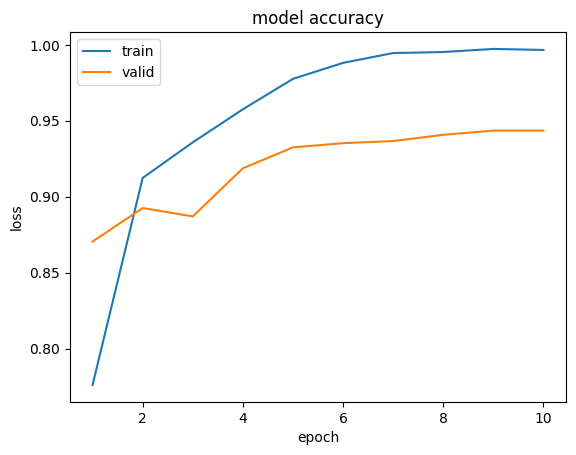

In [ ]:
epochs = range(1, len(history_mobilenetV2.history['accuracy']) + 1)
plt.plot(epochs, history_mobilenetV2.history['accuracy'])
plt.plot(epochs, history_mobilenetV2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], )
plt.show()

In [ ]:
# 모델 평가
loss, accuracy = model_mobilenet.evaluate(test_dataset)
print(f'MobileNetV2 모델 정확도: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9590 - loss: 0.1725
MobileNetV2 모델 정확도: 0.944903552532196


## 4.3 MobileNetV2 모델 예측결과 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 클래스 이름 가져오기 (꽃 종류)
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# 배치를 해제하여 개별 이미지와 레이블을 가져옵니다.
validation_unbatched = test_dataset.unbatch()

# 검증 데이터에서 처음 10개 이미지 가져오기
sample_images = []
sample_labels = []
for image, label in validation_unbatched.take(10):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# 이미지 배열로 변환
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# 예측 수행
predictions = model_mobilenet.predict(sample_images)

# 예측 결과 시각화
for i in range(len(sample_images)):
    plt.figure()
    plt.imshow(sample_images[i])

    # 예측값은 확률로 출력되므로 argmax로 가장 높은 확률을 가진 클래스를 선택
    predicted_label = np.argmax(predictions[i])
    true_label = sample_labels[i]

    # 클래스 이름으로 라벨 변환
    predicted_class_name = class_names[predicted_label]
    true_class_name = class_names[true_label]

    plt.title(f'Pred: {predicted_class_name} / True: {true_class_name}')
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.



---



---



# 5. Tensorflow - ImageDataGenerator 활용 모델링
## 5.1 image data generator 활용 Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import shutil

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강을 위한 ImageDataGenerator 생성
train_datagen = """입력하세요"""(
    rescale=1./255,            # 0~1 범위로 정규화
    rotation_range=40,          # 이미지 회전 범위
    width_shift_range=0.2,      # 수평 이동 범위
    height_shift_range=0.2,     # 수직 이동 범위
    shear_range=0.2,            # 전단 변환 범위
    zoom_range=0.2,             # 확대/축소 범위
    horizontal_flip=True,       # 이미지 좌우 반전
    fill_mode='nearest',        # 빈 픽셀을 채우는 방식
    validation_split=0.2        # 검증 데이터셋으로 20%를 분리
)

# 검증 데이터셋은 증강 없이 정규화만 수행
validation_datagen = """입력하세요"""(rescale=1./255, validation_split=0.2)

In [ ]:
# 이미지 크기 및 배치 사이즈 설정
IMG_SIZE = 224  # 향후 실습에서 VGG, MobileNet Pre-trained Model은 224,224 input size
BATCH_SIZE = 64

# 증강된 학습 데이터셋 로드
train_generator = train_datagen."""입력하세요"""(
    data_dir,               # 이미지 경로
    target_size=(IMG_SIZE, IMG_SIZE),  # 이미지 크기 조정
    batch_size=BATCH_SIZE,      # 배치 크기
    class_mode='categorical',        # 다중 분류
    subset='"""입력하세요"""',          # 훈련용 데이터셋
    seed=123                    # 시드 고정
)

# 검증 데이터셋 로드
validation_generator = """입력하세요""".flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='"""입력하세요"""',        # 다중 분류
    subset='validation',        # 검증용 데이터셋
    seed=123
)

# 출력 확인
print(f'Training samples found: {train_generator.samples}')
print(f'Validation samples found: {validation_generator.samples}')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Training samples found: 2939
Validation samples found: 731


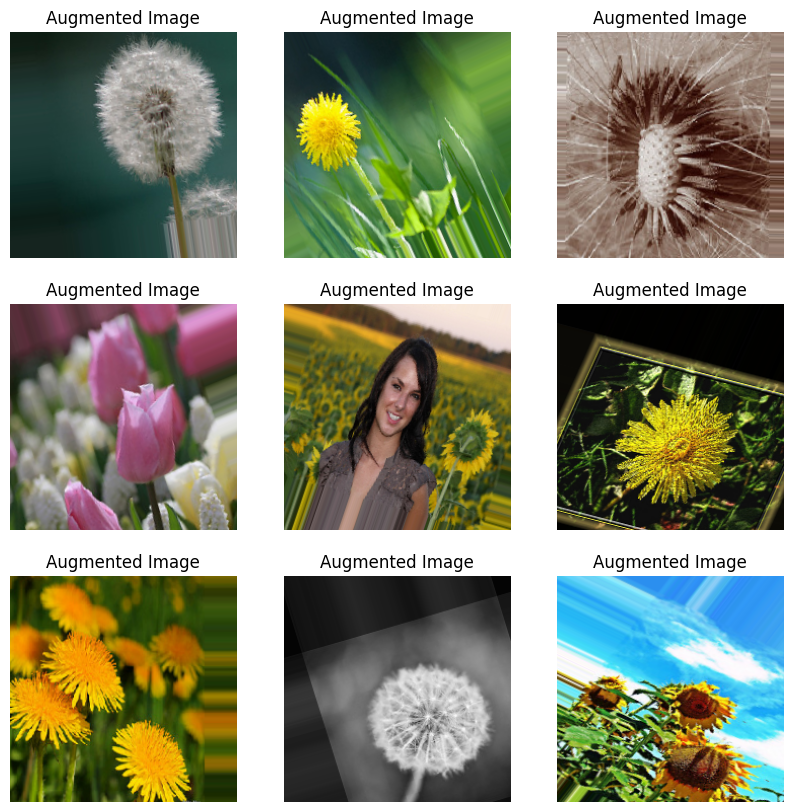

In [ ]:
# 증강된 이미지 시각화
import matplotlib.pyplot as plt

# 증강된 이미지들 중 일부를 시각화
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title("Augmented Image")
    plt.axis("off")
plt.show()

## 5.2 Augmented Dataset 기반 기본CNN 모델 성능개선 평가


In [ ]:
from tensorflow.keras import layers, models

# CNN 모델 정의
model_cnn = models.Sequential([
    layers."""입력하세요"""(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers."""입력하세요"""(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers."""입력하세요"""(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5개의 클래스
])

# 모델 컴파일
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 조기종료 콜백함수 정의(EarlyStopping)
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 체크포인트 저장(ModelCheckpoint)
checkpoint_path = 'tmp_checkpoint.keras'
cp = ModelCheckpoint(filepath = checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# 모델 학습
history_cnn = model_cnn.fit(train_generator, validation_data="""입력하세요""", epochs=30, batch_size=BATCH_SIZE, callbacks=[es, cp], verbose=1)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3229 - loss: 1.9663
Epoch 1: val_loss improved from inf to 1.11791, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.3249 - loss: 1.9562 - val_accuracy: 0.5289 - val_loss: 1.1179
Epoch 2/30
43/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5758 - loss: 1.0290
Epoch 2: val_loss improved from 1.11791 to 0.87202, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5780 - loss: 1.0269 - val_accuracy: 0.6956 - val_loss: 0.8720
Epoch 3/30
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6844 - loss: 0.8346
Epoch 3: val_loss improved from 0.87202 to 0.70564, saving model to tmp_checkpoint.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6849 - loss: 0.8341 - val_accuracy: 0.7521 - val_loss: 0.7056
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7450 - loss: 0.6763
Epoch 4: val_loss improved from 0.70564 to 0.485

In [ ]:
# 모델 평가
loss, accuracy = model_cnn.evaluate(validation_generator)
print(f'Augmented Dataset활용 기본 CNN 모델 정확도: {accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.9408 - loss: 0.4652
Augmented Dataset활용 기본 CNN 모델 정확도: 0.9220246076583862


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 클래스 이름 가져오기 (꽃 종류)
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# 배치에서 일부 이미지와 레이블을 가져오기
sample_batch = next(validation_generator)  # validation_generator에서 배치 데이터 가져오기
sample_images, sample_labels = sample_batch

# # 검증 데이터에서 처음 10개 이미지 가져오기
# for image, label in validation_unbatched.take(10):
#     sample_images.append(image.numpy())
#     sample_labels.append(label.numpy())

# 이미지 배열로 변환
sample_images = np.array(sample_images)
sample_labels = np.array(sample_labels)

# 예측 수행
predictions = model_cnn.predict(sample_images)

# 예측 결과 시각화
for i in range(len(sample_images)):
    plt.figure()
    plt.imshow(sample_images[i])

    # 예측값은 확률로 출력되므로 argmax로 가장 높은 확률을 가진 클래스를 선택
    predicted_label = np.argmax(predictions[i])
    true_label = sample_labels[i]

    # 클래스 이름으로 라벨 변환
    predicted_class_name = class_names[predicted_label]
    true_class_name = class_names[int(true_label)]

    plt.title(f'Pred: {predicted_class_name} / True: {true_class_name}')
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.